# TASK 2: UNEMPLOYMENT ANALYSIS WITH PYTHON

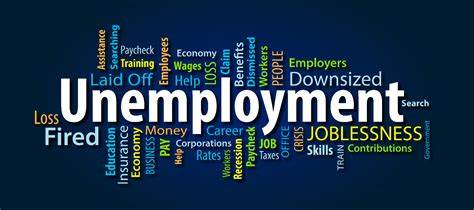

This data analysis based on the dataset contains data during covid period of unenployment rate in the country by it's states.

**1. First of all importing all the necessary libaries which I need for data analsis.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2. Loading the csv dataset 'Unemployment in India'.**

In [2]:
data = pd.read_csv('Unemployment in India.csv')
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


*2.1 Dimension and information of the dataset.*

In [3]:
print("Dimension of the dataset: ", data.shape)

print('-'*50)
data.info()

Dimension of the dataset:  (768, 7)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


*2.2 Dealing with Null value in the dataset*

In [4]:
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

It seems that the dataset contain 28 blank rows. So, removing this rows.

In [5]:
data.dropna(inplace = True)

In [6]:
print("Dimension of the dataset: ", data.shape)
data.isnull().sum()

Dimension of the dataset:  (740, 7)


Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

Which indicates that all null rows has been successfully removed from the dataset.

**3. Making all columns in a porper manner with suitable data types.**

In [7]:
data.rename(columns= {'Region':'States'}, inplace =True)

In [8]:
data.head()

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [9]:
data.columns

Index(['States', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

*3.1 Since, In some column name the first place their is space, So, reomving it. and shorten the length of the coulmn name*

In [10]:
column = ['States', 'Date', 'Frequency', 'Est_Unemp_Rate',
       'Est_Emp', 'Est_Lab_Part_Rate',
       'Area']

Short Name with it's complete name:
* Est_Emp_rate = Estimated Unemployment Rate (%)
* Est_Emp = Estimated Employed
* Est_Lab_Part_rate = Estimated Labour Participation Rate (%)

In [11]:
data.columns = column

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   States             740 non-null    object 
 1   Date               740 non-null    object 
 2   Frequency          740 non-null    object 
 3   Est_Unemp_Rate     740 non-null    float64
 4   Est_Emp            740 non-null    float64
 5   Est_Lab_Part_Rate  740 non-null    float64
 6   Area               740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


*Blank space removed successfully !!!*

*3.3 Frequency column.*

In [13]:
data['Frequency'].unique()

array([' Monthly', 'Monthly'], dtype=object)

In [14]:
data.drop('Frequency',inplace=True, axis= 1)

*3.4 Estimated Employed*

In [15]:
data['Est_Emp'] = data['Est_Emp'].astype('int')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   States             740 non-null    object 
 1   Date               740 non-null    object 
 2   Est_Unemp_Rate     740 non-null    float64
 3   Est_Emp            740 non-null    int32  
 4   Est_Lab_Part_Rate  740 non-null    float64
 5   Area               740 non-null    object 
dtypes: float64(2), int32(1), object(3)
memory usage: 37.6+ KB


*3.5 Changing data of the column 'Est_Emp' by million by dividing by 1000000.*

In [17]:
data['Est_Miln_Emp'] = round(data['Est_Emp']/1000000,2)

* 3.5 Est_Miln_Emp = Estimate Million Empolyee

In [18]:
data.drop('Est_Emp',axis=1,inplace=True)

In [19]:
column_new = ['States', 'Date','Est_Unemp_Rate','Est_Lab_Part_Rate','Est_Miln_Emp','Area']
data = data.reindex(columns= column_new)

In [20]:
data.head()

,States,Date,Est_Unemp_Rate,Est_Lab_Part_Rate,Est_Miln_Emp,Area
0,Andhra Pradesh,31-05-2019,3.65,43.24,12.00,Rural
1,Andhra Pradesh,30-06-2019,3.05,42.05,11.76,Rural
2,Andhra Pradesh,31-07-2019,3.75,43.50,12.09,Rural
3,Andhra Pradesh,31-08-2019,3.32,43.97,12.29,Rural
4,Andhra Pradesh,30-09-2019,5.17,44.68,12.26,Rural


**4. Data Visualization**

Transforming the data to get insights from the dataset.

*4.1 Data Visalization of Empolyment in Millions by Months by Area.*

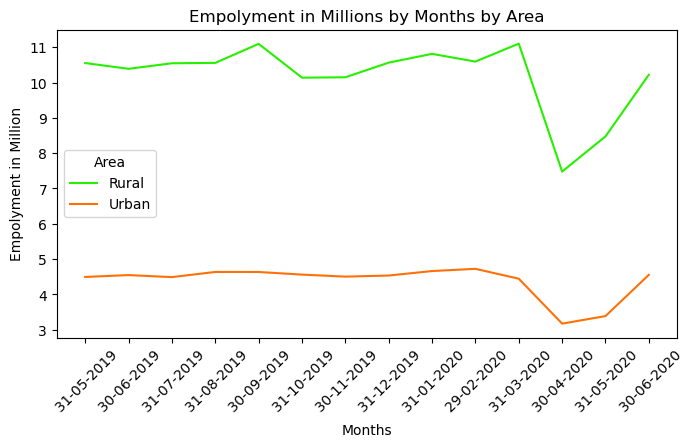

In [21]:
plt.figure(figsize = (8,4))
sns.lineplot(data=data, x='Date', y='Est_Miln_Emp', hue='Area', errorbar= None,palette = 'gist_ncar')
plt.title('Empolyment in Millions by Months by Area')
plt.xticks(rotation = 45)
plt.xlabel('Months')
plt.ylabel('Empolyment in Million')
plt.show()

*4.2 Data Visalization of Average Unempolyment Rate by Months by Area.*

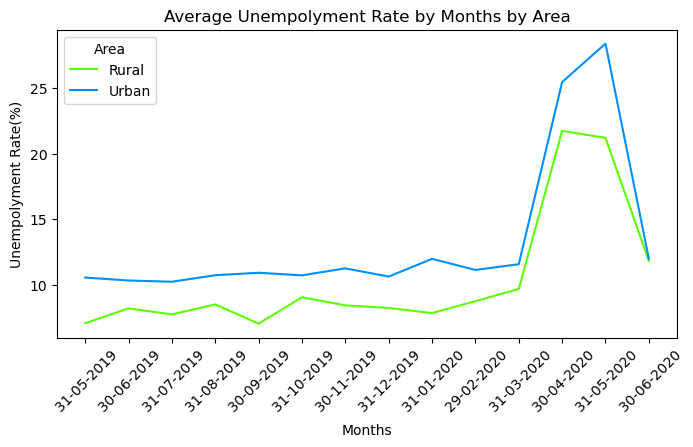

In [22]:
plt.figure(figsize = (8,4))
sns.lineplot(data=data, x='Date', y='Est_Unemp_Rate', hue='Area', errorbar= None, palette ='gist_rainbow')
plt.title('Average Unempolyment Rate by Months by Area')
plt.xticks(rotation = 45)
plt.xlabel('Months')
plt.ylabel('Unempolyment Rate(%)')
plt.show()

*4.3 Data Visalization ofAverage Labour Praticipation Rate (%) by Months by Area.*

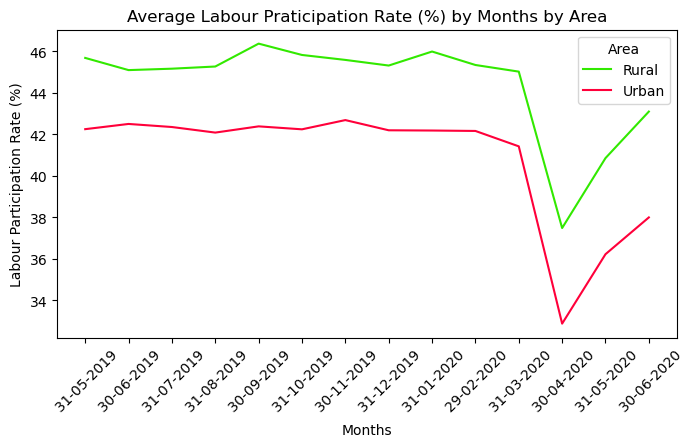

In [23]:
plt.figure(figsize = (8,4))
sns.lineplot(data=data, x='Date', y='Est_Lab_Part_Rate', hue='Area', errorbar= None, palette ='prism')
plt.title('Average Labour Praticipation Rate (%) by Months by Area')
plt.xticks(rotation = 45)
plt.xlabel('Months')
plt.ylabel('Labour Participation Rate (%)')
plt.show()

*4.4 Data Visalization for Detecting outliers in Unemploment rates per region.*

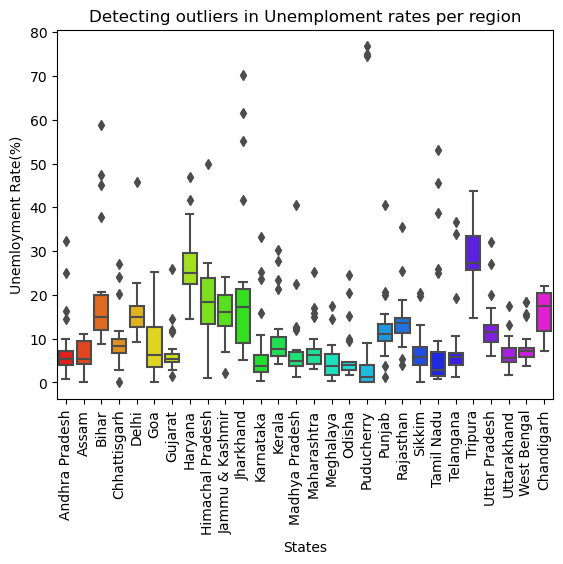

In [24]:
sns.boxplot(data= data, x='States', y='Est_Unemp_Rate',palette ='gist_rainbow')
plt.title('Detecting outliers in Unemploment rates per region')
plt.ylabel('Unemloyment Rate(%)')
plt.xticks(rotation = 90)
plt.show()

*4.5 Data Visalization of Empolyment in Millions by States During Covid-19.*

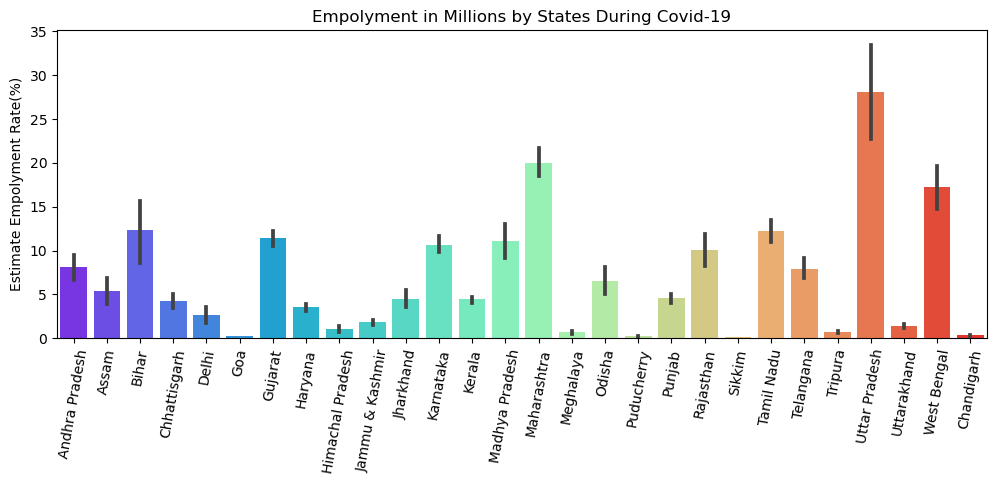

In [25]:
plt.figure(figsize = (12,4))

sns.barplot(data=data, x='States', y='Est_Miln_Emp',palette = 'rainbow')

plt.title('Empolyment in Millions by States During Covid-19')
plt.xticks(rotation = 80)
plt.xlabel('')
plt.ylabel('Estimate Empolyment Rate(%)')
plt.show()

*4.6 Data Visalization of Average Unmpolyment Rate by States During Covid-19.*

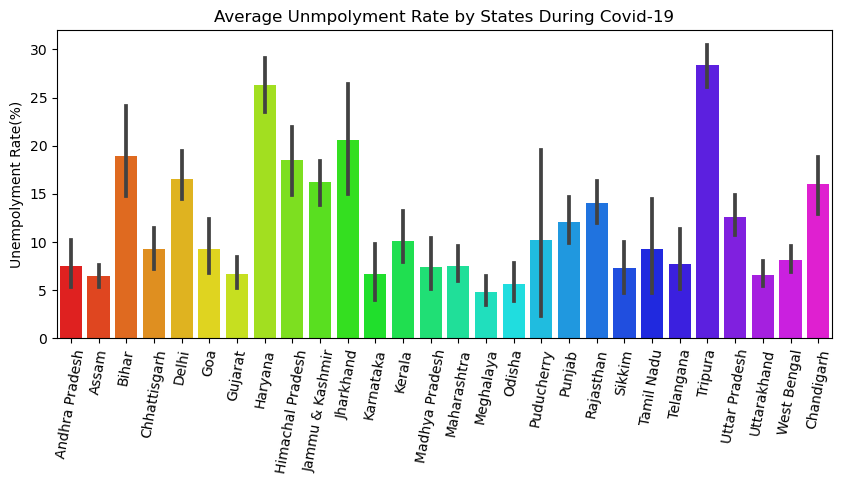

In [26]:
plt.figure(figsize = (10,4))

sns.barplot(data=data, x='States', y='Est_Unemp_Rate',palette = 'gist_rainbow')

plt.title('Average Unmpolyment Rate by States During Covid-19')
plt.xticks(rotation = 80)
plt.xlabel('')
plt.ylabel('Unempolyment Rate(%)')
plt.show()

*4.7 Data Visalization of Average Labour Praticipation Rate (%) by States During Covid-19.*

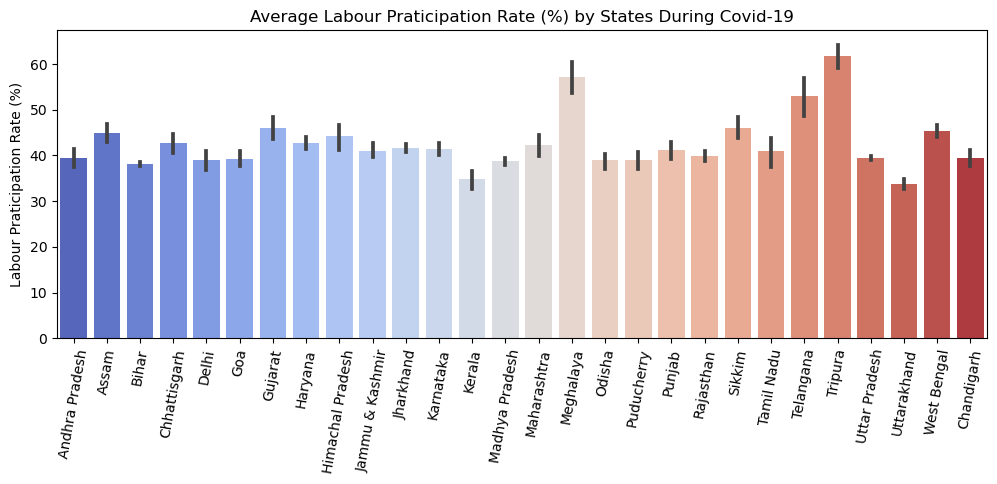

In [27]:
plt.figure(figsize = (12,4))
sns.barplot(data=data, x='States', y='Est_Lab_Part_Rate',palette = 'coolwarm')
plt.title('Average Labour Praticipation Rate (%) by States During Covid-19')
plt.xticks(rotation = 80)
plt.xlabel('')
plt.ylabel('Labour Praticipation Rate (%)')
plt.show()

*4.8 Data Visalization ofAverage Unemployment Rate During Covid-19.*

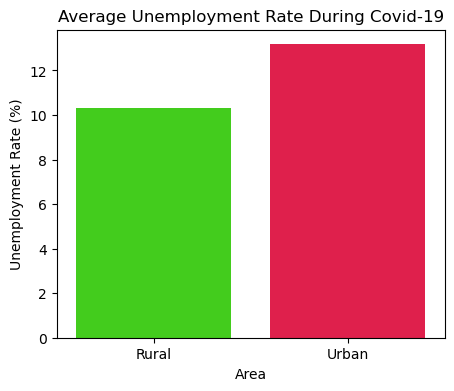

In [28]:
plt.figure(figsize = (5,4))


sns.barplot(data=data, x='Area', y='Est_Unemp_Rate',palette = 'prism',errorbar=('ci', False))

plt.title('Average Unemployment Rate During Covid-19')
plt.xlabel('Area')
plt.ylabel('Unemployment Rate (%)')
plt.show()

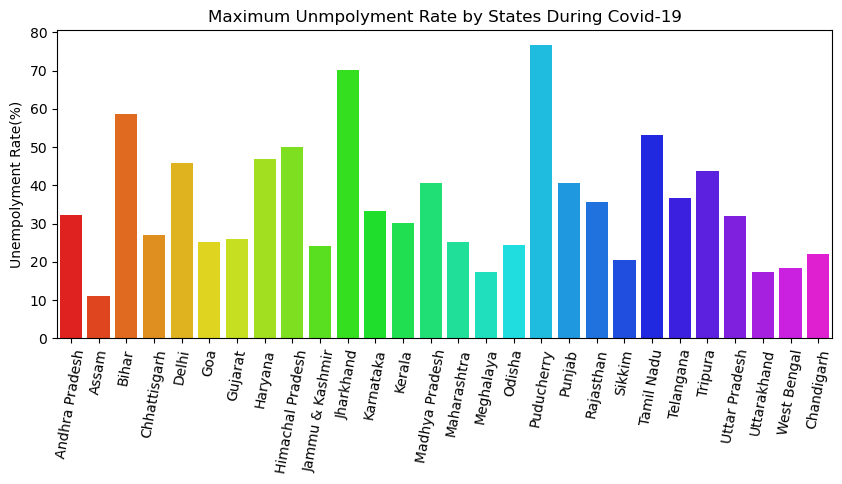

In [29]:
plt.figure(figsize = (10,4))

sns.barplot(data=data, x='States', y='Est_Unemp_Rate',estimator = 'max',palette = 'gist_rainbow',errorbar=('ci', False))

plt.title('Maximum Unmpolyment Rate by States During Covid-19')
plt.xticks(rotation = 80)
plt.xlabel('')
plt.ylabel('Unempolyment Rate(%)')
plt.show()

- Puducherry has maximum unemplyment rate during covid-19

>                                          Thank You.